# 

In [1]:
!pip install rouge

  Using cached rouge-1.0.1-py3-none-any.whl.metadata (4.1 kB)
Using cached rouge-1.0.1-py3-none-any.whl (13 kB)


In [2]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=2b1490489548ffb4e4e4f2121e838038135b9cc8daa4442fd0059410638cf84f
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [3]:
# # import pandas as pd
# import re
# import torch
# from torch.utils.data import Dataset, DataLoader
# from transformers import BartTokenizer, BartForConditionalGeneration, AdamW
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk import download
# import numpy as np
# from rouge import Rouge
# import matplotlib.pyplot as plt

# download('punkt')
# download('stopwords')

# def preprocess(text):
#     if pd.isna(text):
#         return ""  # Return an empty string if the text is NaN
#     text = str(text).lower()
#     text = re.sub(r'\b\d+\b', ' ', text)
#     text = re.sub(r'[^a-z\s]', ' ', text)
#     stop_words = set(stopwords.words('english'))
#     words = word_tokenize(text)
#     return ' '.join(word for word in words if word not in stop_words)

# train_df = pd.read_csv('/kaggle/input/input-dataset/train.csv')
# val_df = pd.read_csv('/kaggle/input/input-dataset/validation.csv')
# test_df = pd.read_csv('/kaggle/input/input-dataset/test.csv')

# train_df['Text'] = train_df['Text'].apply(preprocess)
# train_df['Summary'] = train_df['Summary'].apply(preprocess)
# val_df['Text'] = val_df['Text'].apply(preprocess)
# val_df['Summary'] = val_df['Summary'].apply(preprocess)
# test_df['Text'] = test_df['Text'].apply(preprocess)
# test_df['Summary'] = test_df['Summary'].apply(preprocess)

# class TextSummarizationDataset(Dataset):
#     def __init__(self, texts, summaries, tokenizer, max_length=512):
#         self.texts = texts
#         self.summaries = summaries
#         self.tokenizer = tokenizer
#         self.max_length = max_length
    
#     def __len__(self):
#         return len(self.texts)
    
#     def __getitem__(self, idx):
#         text = self.texts[idx]
#         summary = self.summaries[idx]
#         model_input = self.tokenizer(text, truncation=True, padding='max_length', max_length=self.max_length, return_tensors="pt")
#         labels = self.tokenizer(summary, truncation=True, padding='max_length', max_length=self.max_length, return_tensors="pt").input_ids
#         labels[labels == 0] = -100  # Set padding token ids to -100 to exclude from loss calculation
#         return model_input, labels.squeeze()

# device = "cuda" if torch.cuda.is_available() else "cpu"
# tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
# model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn').to(device)

# train_dataset = TextSummarizationDataset(train_df['Text'], train_df['Summary'], tokenizer)
# val_dataset = TextSummarizationDataset(val_df['Text'], val_df['Summary'], tokenizer)
# train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

# optimizer = AdamW(model.parameters(), lr=5e-5)
# epochs = 3
# best_val_loss = float('inf')
# train_losses = []
# val_losses = []
# rouge = Rouge()

# for epoch in range(epochs):
#     model.train()
#     total_loss = 0
#     for batch in train_loader:
#         optimizer.zero_grad()
#         input_ids = batch[0]['input_ids'].squeeze().to(device)
#         attention_mask = batch[0]['attention_mask'].squeeze().to(device)
#         labels = batch[1].to(device)

#         outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
#         loss = outputs.loss
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()

#     avg_train_loss = total_loss / len(train_loader)
#     train_losses.append(avg_train_loss)

#     # Validation phase
#     model.eval()
#     total_val_loss = 0
#     batch_rouge_scores = {'rouge-1': [], 'rouge-2': [], 'rouge-l': []}
#     with torch.no_grad():
#         for batch in val_loader:
#             input_ids = batch[0]['input_ids'].squeeze().to(device)
#             attention_mask = batch[0]['attention_mask'].squeeze().to(device)
#             labels = batch[1].to(device)

#             outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
#             loss = outputs.loss
#             total_val_loss += loss.item()

#             decoded_preds = tokenizer.batch_decode(outputs.logits.argmax(dim=-1), skip_special_tokens=True)
#             decoded_labels = tokenizer.batch_decode(labels.where(labels != -100, tokenizer.pad_token_id), skip_special_tokens=True)

#             for pred, label in zip(decoded_preds, decoded_labels):
#                 scores = rouge.get_scores(pred, label, avg=True)
#                 for key in batch_rouge_scores:
#                     batch_rouge_scores[key].append(scores[key]['f'])

#     avg_val_loss = total_val_loss / len(val_loader)
#     val_losses.append(avg_val_loss)

#     for key in batch_rouge_scores:
#         rouge_scores[key] = np.mean(batch_rouge_scores[key])

#     print(f"Epoch {epoch+1}/{epochs} - Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")
#     print(f"ROUGE-1: {rouge_scores['rouge-1']:.4f}, ROUGE-2: {rouge_scores['rouge-2']:.4f}, ROUGE-L: {rouge_scores['rouge-l']:.4f}")

#     if avg_val_loss < best_val_loss:
#         best_val_loss = avg_val_loss
#         model.save_pretrained('./fine_tuned_bart')
#         print("Model improved and saved.")

# # Plot training and validation loss
# plt.figure(figsize=(10, 5))
# plt.plot(train_losses, label='Train Loss')
# plt.plot(val_losses, label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()*/

# rouge scores graph and model svaing

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/modeling_utils.py:2817: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


Model improved and saved at epoch: 1
Model improved and saved at epoch: 2


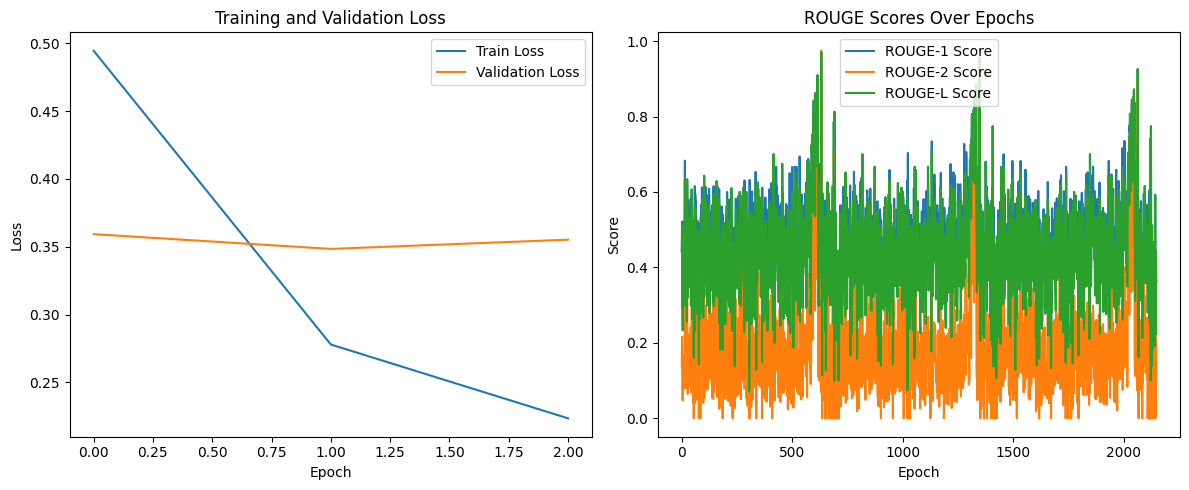

Generated summaries saved to 'generated_summaries.txt'.
Final model saved.


In [4]:
import pandas as pd
import re
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BartTokenizer, BartForConditionalGeneration, AdamW
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import download
import numpy as np
from rouge import Rouge
import matplotlib.pyplot as plt

download('punkt')
download('stopwords')

def preprocess(text):
    if pd.isna(text):
        return ""  # Return an empty string if the text is NaN
    text = str(text).lower()
    text = re.sub(r'\b\d+\b', ' ', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return ' '.join(word for word in words if word not in stop_words)

train_df = pd.read_csv('/kaggle/input/input-dataset/train.csv')
val_df = pd.read_csv('/kaggle/input/input-dataset/validation.csv')
test_df = pd.read_csv('/kaggle/input/input-dataset/test.csv')

train_df['Text'] = train_df['Text'].apply(preprocess)
train_df['Summary'] = train_df['Summary'].apply(preprocess)
val_df['Text'] = val_df['Text'].apply(preprocess)
val_df['Summary'] = val_df['Summary'].apply(preprocess)
test_df['Text'] = test_df['Text'].apply(preprocess)
test_df['Summary'] = test_df['Summary'].apply(preprocess)

class TextSummarizationDataset(Dataset):
    def __init__(self, texts, summaries, tokenizer, max_length=512):
        self.texts = texts
        self.summaries = summaries
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        summary = self.summaries[idx]
        model_input = self.tokenizer(text, truncation=True, padding='max_length', max_length=self.max_length, return_tensors="pt")
        labels = self.tokenizer(summary, truncation=True, padding='max_length', max_length=self.max_length, return_tensors="pt").input_ids
        labels[labels == 0] = -100
        return model_input, labels.squeeze()

device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn').to(device)

train_dataset = TextSummarizationDataset(train_df['Text'], train_df['Summary'], tokenizer)
val_dataset = TextSummarizationDataset(val_df['Text'], val_df['Summary'], tokenizer)
test_dataset = TextSummarizationDataset(test_df['Text'], test_df['Summary'], tokenizer)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

optimizer = AdamW(model.parameters(), lr=5e-5)
epochs = 3
best_val_loss = float('inf')
train_losses = []
val_losses = []
rouge_scores = {'rouge-1': [], 'rouge-2': [], 'rouge-l': []}

rouge = Rouge()

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch[0]['input_ids'].squeeze().to(device)
        attention_mask = batch[0]['attention_mask'].squeeze().to(device)
        labels = batch[1].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch[0]['input_ids'].squeeze().to(device)
            attention_mask = batch[0]['attention_mask'].squeeze().to(device)
            labels = batch[1].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_val_loss += loss.item()

            decoded_preds = tokenizer.batch_decode(outputs.logits.argmax(dim=-1), skip_special_tokens=True)
            decoded_labels = tokenizer.batch_decode(labels.where(labels != -100, tokenizer.pad_token_id), skip_special_tokens=True)

            for pred, label in zip(decoded_preds, decoded_labels):
                scores = rouge.get_scores(pred, label, avg=True)
                for key in rouge_scores:
                    rouge_scores[key].append(scores[key]['f'])

    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        model.save_pretrained('./fine_tuned_bart')
        print("Model improved and saved at epoch:", epoch+1)

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot ROUGE scores
plt.subplot(1, 2, 2)
rouge_keys = ['rouge-1', 'rouge-2', 'rouge-l']
for key in rouge_keys:
    plt.plot([np.mean(scores) for scores in rouge_scores[key]], label=f'{key.upper()} Score')
plt.title('ROUGE Scores Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()

# Testing the model and saving outputs
model.eval()
summaries = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch[0]['input_ids'].squeeze().to(device)
        outputs = model.generate(input_ids, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
        summaries.extend(tokenizer.batch_decode(outputs, skip_special_tokens=True))

# Save the generated summaries to a text file
with open('generated_summaries.txt', 'w') as file:
    for summary in summaries:
        file.write(summary + "\n\n")

print("Generated summaries saved to 'generated_summaries.txt'.")
# Save the final model
model.save_pretrained('./fine_tuned_bart')
print("Final model saved.")


In [1]:
# Test reading the file
with open('generated_summaries.txt', 'r') as file:
    content = file.read()
    print(content[:500])  # Print first 500 characters of the summaries


FileNotFoundError: [Errno 2] No such file or directory: 'generated_summaries.txt'